# 1.7.3 Epipolar Geometry

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

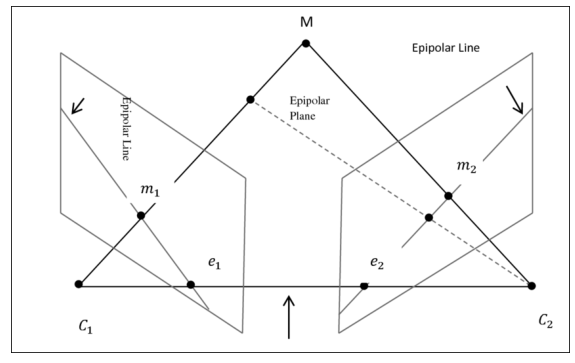

In [2]:
pic = cv2.imread('Epipolar.png',0)
plt.figure(figsize=(10,10))
plt.imshow(pic,'gray')
plt.xticks([]), plt.yticks([])
plt.show()

In [41]:
img1 = cv2.imread('sim12.jpg',0) #queryimage # left image sIMG_2541 sim2
img2 = cv2.imread('sim11.jpg',0) #trainimage # right image sIMG_2542 sim3
sift = cv2.SIFT_create()

In [42]:
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

In [43]:
print(len(kp1),len(kp2))

1653 1495


In [44]:
# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)
good = []
pts1 = []
pts2 = []
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.5*n.distance:
        good.append(m)
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)

In [46]:
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)
F, mask = cv2.findFundamentalMat(pts1,pts2,cv2.FM_LMEDS)
# We select only inlier points
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]

AttributeError: 'NoneType' object has no attribute 'ravel'

In [8]:
print(F)
print(pts1.shape, pts2.shape)

[[ 2.60532583e-22  1.66740853e-19 -2.33747284e-17]
 [-1.58403810e-19 -6.25278198e-21 -5.64097911e-03]
 [ 2.23411807e-17  5.64097911e-03  6.66133815e-16]]
(262, 2) (262, 2)


In [37]:
def drawlines(img1,img2,lines,pts1,pts2):
    ''' img1 - image on which we draw the epilines for the points in img2
    lines - corresponding epilines '''
    r,c = img1.shape
    img1 = cv2.cvtColor(img1,cv2.COLOR_GRAY2BGR)
    img2 = cv2.cvtColor(img2,cv2.COLOR_GRAY2BGR)
    for r,pt1,pt2 in zip(lines,pts1,pts2):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv2.line(img1, (x0,y0), (x1,y1), color,1)
        img1 = cv2.circle(img1,tuple(pt1),5,color,-1)
        img2 = cv2.circle(img2,tuple(pt2),5,color,-1)
    return img1,img2

In [38]:
# Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image
lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2,F)
lines1 = lines1.reshape(-1,3)
img5,img6 = drawlines(img1,img2,lines1,pts1,pts2)

In [39]:
# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1,1,2), 1,F)
lines2 = lines2.reshape(-1,3)
img3,img4 = drawlines(img2,img1,lines2,pts2,pts1)

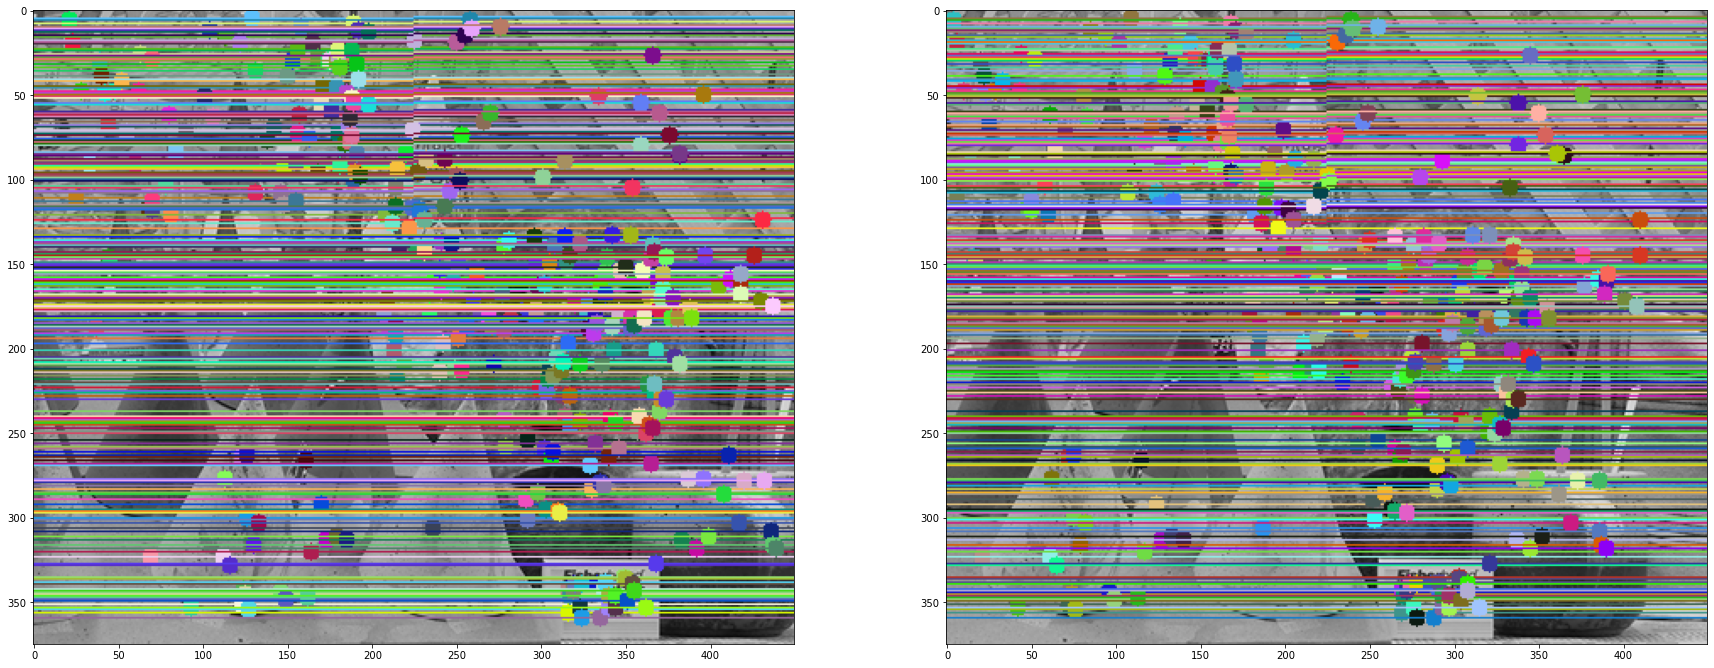

In [40]:
plt.figure(figsize=(30,30))
plt.subplot(121),plt.imshow(img5)
plt.subplot(122),plt.imshow(img3)
plt.show()

# 1.7.4 Depth Map from Stereo Images

In [13]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [14]:
imgL = cv2.imread('sim2.png',0)
imgR = cv2.imread('sim3.png',0)

In [15]:
#stereo = cv2.createStereoBM(numDisparities=16, blockSize=15)
stereo = cv2.StereoBM_create(numDisparities=64, blockSize=5)
disparity = stereo.compute(imgL,imgR)

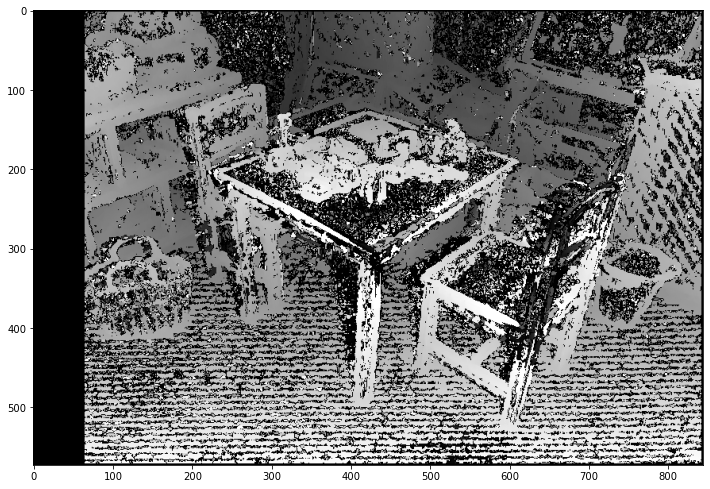

In [16]:
plt.figure(figsize=(12,12))
plt.imshow(disparity,'gray')
plt.show()